BIKE PRICE PREDICTION

In [270]:
# importing pandas, numpy, matplotlib, seaborn and warning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [271]:
# loading the data from csv file to pandas dataframe
df=pd.read_csv("bike_buyers.csv")

In [272]:
# inspecting the first 5 rows of the dataframe
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [273]:
# inspecting the last 5 rows of the dataframe
df.tail()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
997,11809,Married,NaN,60000.0,2.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No
999,12121,Single,Male,60000.0,3.0,High School,Professional,Yes,2.0,10+ Miles,North America,53.0,Yes


In [274]:
# checking the number of rows and columns
df.shape

(1000, 13)

In [275]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [276]:
# checking the number of missing values
df.isnull().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [277]:
# Checking outliers
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [278]:
# checking unique values of all columns
df.nunique()

ID                  1000
Marital Status         2
Gender                 2
Income                16
Children               6
Education              5
Occupation             5
Home Owner             2
Cars                   5
Commute Distance       5
Region                 3
Age                   53
Purchased Bike         2
dtype: int64

In [279]:
# Checking skewness
df.skew()

ID          0.045449
Income      0.751171
Children    0.393000
Cars        0.417883
Age         0.523397
dtype: float64

In [280]:
# checking value count 
df['Marital Status'].value_counts()

Married    535
Single     458
Name: Marital Status, dtype: int64

In [281]:
# searching for nan values
df['Marital Status'].head(50)

0     Married
1     Married
2     Married
3      Single
4      Single
5     Married
6      Single
7     Married
8         NaN
9     Married
10    Married
11     Single
12    Married
13    Married
14     Single
15     Single
16     Single
17    Married
18     Single
19     Single
20    Married
21     Single
22     Single
23    Married
24     Single
25     Single
26     Single
27        NaN
28    Married
29     Single
30    Married
31    Married
32     Single
33     Single
34     Single
35     Single
36    Married
37     Single
38     Single
39     Single
40     Single
41     Single
42    Married
43    Married
44    Married
45    Married
46    Married
47     Single
48    Married
49        NaN
Name: Marital Status, dtype: object

In [282]:
# searching for nan values
df.Gender.head(50)

0     Female
1       Male
2       Male
3        NaN
4       Male
5     Female
6       Male
7       Male
8       Male
9       Male
10    Female
11    Female
12      Male
13      Male
14      Male
15    Female
16      Male
17    Female
18      Male
19      Male
20    Female
21    Female
22      Male
23    Female
24      Male
25      Male
26      Male
27    Female
28      Male
29    Female
30    Female
31      Male
32    Female
33      Male
34      Male
35    Female
36    Female
37    Female
38      Male
39    Female
40    Female
41    Female
42    Female
43    Female
44    Female
45    Female
46    Female
47    Female
48      Male
49      Male
Name: Gender, dtype: object

In [283]:
# searching for nan values
df.Income.head(50)

0      40000.0
1      30000.0
2      80000.0
3      70000.0
4      30000.0
5      10000.0
6     160000.0
7      40000.0
8      20000.0
9          NaN
10     30000.0
11     90000.0
12    170000.0
13     40000.0
14     60000.0
15     10000.0
16     30000.0
17     30000.0
18     40000.0
19     20000.0
20     40000.0
21     80000.0
22     40000.0
23     80000.0
24     40000.0
25     30000.0
26     30000.0
27    100000.0
28     70000.0
29     20000.0
30     20000.0
31     10000.0
32     20000.0
33     80000.0
34     90000.0
35     10000.0
36     10000.0
37     30000.0
38     20000.0
39     10000.0
40     30000.0
41     40000.0
42     10000.0
43    170000.0
44     20000.0
45     20000.0
46     60000.0
47     40000.0
48     30000.0
49     40000.0
Name: Income, dtype: float64

In [284]:
# searching for nan values
df.Children.tail(50)

950    1.0
951    0.0
952    4.0
953    3.0
954    1.0
955    4.0
956    4.0
957    0.0
958    5.0
959    1.0
960    NaN
961    2.0
962    2.0
963    5.0
964    4.0
965    3.0
966    0.0
967    3.0
968    0.0
969    0.0
970    0.0
971    2.0
972    1.0
973    1.0
974    3.0
975    3.0
976    3.0
977    4.0
978    5.0
979    0.0
980    3.0
981    5.0
982    2.0
983    2.0
984    2.0
985    4.0
986    5.0
987    3.0
988    5.0
989    4.0
990    0.0
991    1.0
992    2.0
993    1.0
994    5.0
995    2.0
996    4.0
997    2.0
998    3.0
999    3.0
Name: Children, dtype: float64

In [285]:
# searching for nan values
df['Home Owner'].head(50)

0     Yes
1     Yes
2      No
3     Yes
4      No
5     Yes
6     NaN
7     Yes
8     Yes
9     Yes
10     No
11     No
12    Yes
13    Yes
14     No
15    Yes
16     No
17    Yes
18    Yes
19    Yes
20    Yes
21    Yes
22    Yes
23     No
24     No
25    Yes
26     No
27     No
28    Yes
29     No
30    Yes
31     No
32     No
33     No
34     No
35     No
36    Yes
37     No
38     No
39    Yes
40     No
41    Yes
42    Yes
43     No
44    Yes
45    Yes
46    Yes
47    Yes
48     No
49    Yes
Name: Home Owner, dtype: object

In [286]:
# searching for nan values
df.Cars.head(50)

0     0.0
1     1.0
2     2.0
3     1.0
4     0.0
5     0.0
6     4.0
7     0.0
8     2.0
9     1.0
10    2.0
11    4.0
12    NaN
13    1.0
14    1.0
15    1.0
16    2.0
17    0.0
18    1.0
19    2.0
20    0.0
21    4.0
22    0.0
23    3.0
24    1.0
25    0.0
26    1.0
27    1.0
28    2.0
29    2.0
30    0.0
31    1.0
32    1.0
33    2.0
34    2.0
35    2.0
36    1.0
37    1.0
38    1.0
39    2.0
40    0.0
41    2.0
42    0.0
43    3.0
44    0.0
45    0.0
46    1.0
47    2.0
48    2.0
49    0.0
Name: Cars, dtype: float64

In [287]:
# searching for nan values
df.Age.head(50)

0     42.0
1     43.0
2     60.0
3     41.0
4     36.0
5     50.0
6     33.0
7     43.0
8     58.0
9      NaN
10    54.0
11    36.0
12    55.0
13    35.0
14    45.0
15    38.0
16    59.0
17    47.0
18    35.0
19    55.0
20    36.0
21    35.0
22    35.0
23    56.0
24    34.0
25    63.0
26    29.0
27    40.0
28    44.0
29    32.0
30    63.0
31    26.0
32    31.0
33    50.0
34    62.0
35    41.0
36    50.0
37    30.0
38    28.0
39    40.0
40    43.0
41    65.0
42    40.0
43    48.0
44    41.0
45    66.0
46    46.0
47    52.0
48    42.0
49    39.0
Name: Age, dtype: float64

In [288]:
# dropping the rows as it is less than 3%
newdf=df.dropna()

In [289]:
# Again checking the rows and columns
newdf.shape

(952, 13)

In [290]:
# checking that missing values has been removed
newdf.isnull().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [291]:
newdf

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,13466,Married,Male,80000.0,5.0,Partial College,Professional,Yes,3.0,1-2 Miles,North America,46.0,No
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No


In [292]:
# checking that all columns has been came in same count
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                952 non-null    int64  
 1   Marital Status    952 non-null    object 
 2   Gender            952 non-null    object 
 3   Income            952 non-null    float64
 4   Children          952 non-null    float64
 5   Education         952 non-null    object 
 6   Occupation        952 non-null    object 
 7   Home Owner        952 non-null    object 
 8   Cars              952 non-null    float64
 9   Commute Distance  952 non-null    object 
 10  Region            952 non-null    object 
 11  Age               952 non-null    float64
 12  Purchased Bike    952 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 104.1+ KB


In [293]:
# dividing data into categorial and numerical columns

numcol=newdf.select_dtypes(["int64","float64"]).columns
catcol=newdf.select_dtypes(["object"]).columns

In [294]:
# This is numerical cloumn
numcol

Index(['ID', 'Income', 'Children', 'Cars', 'Age'], dtype='object')

In [295]:
# This is categorial column
catcol

Index(['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner',
       'Commute Distance', 'Region', 'Purchased Bike'],
      dtype='object')

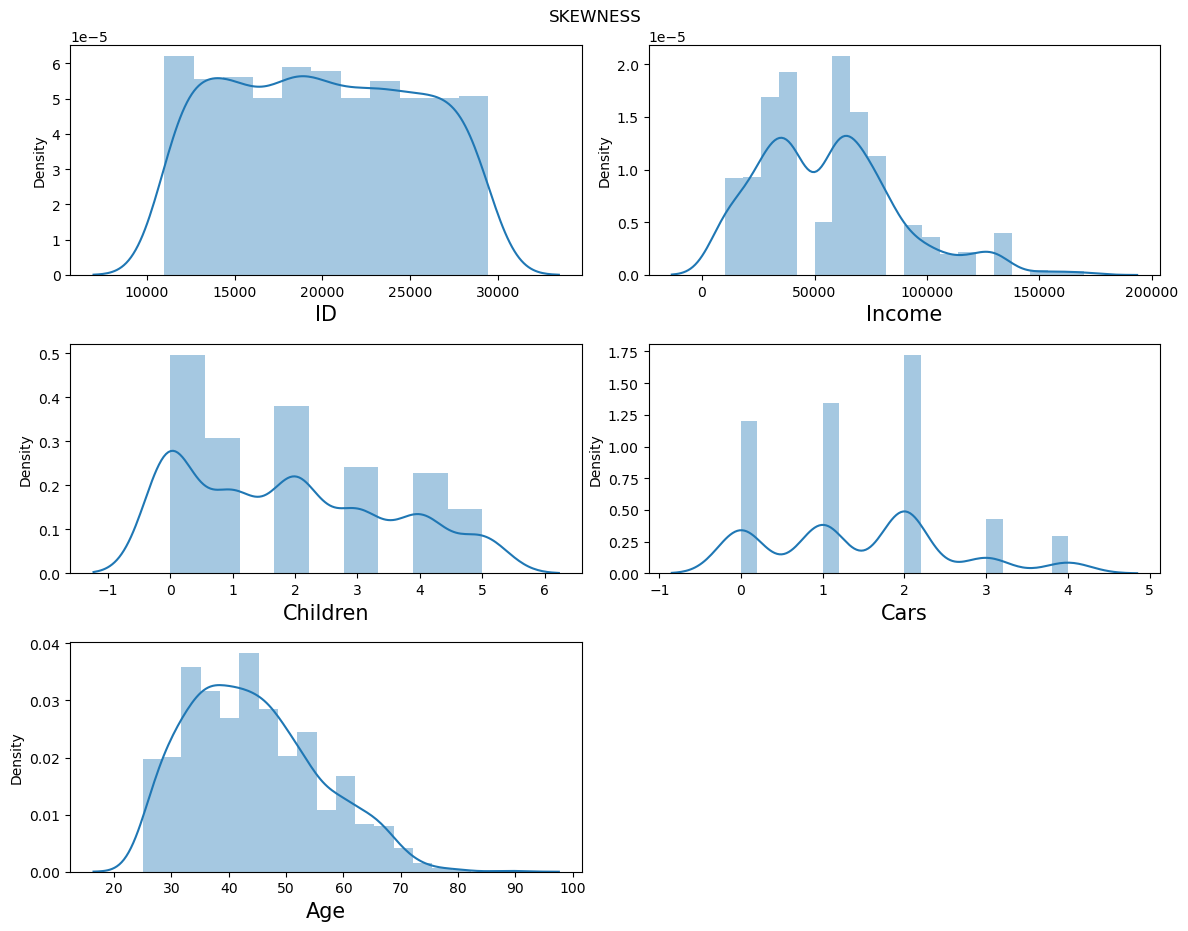

In [296]:
# Checking for skewness with the help of for loop

plt.figure(figsize=(12,12))
plt.suptitle("SKEWNESS")
pltn=1
for i in numcol:
    if pltn<=8:
        ax=plt.subplot(4,2,pltn)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=15)
    pltn=pltn+1
plt.tight_layout()

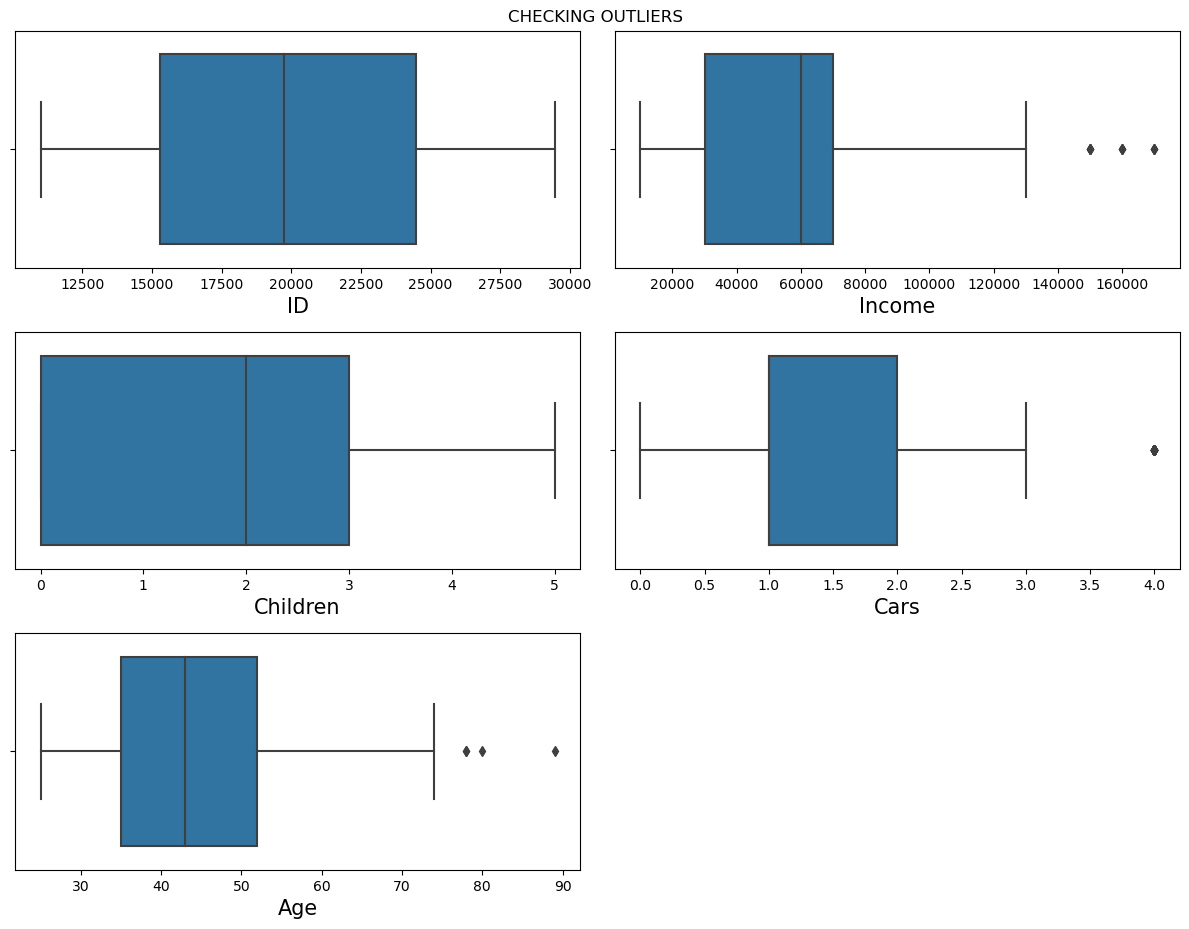

In [297]:
# Checking for Outliers with the help of for loop

plt.figure(figsize=(12,12))
plt.suptitle("CHECKING OUTLIERS")
pltn=1
for i in numcol:
    if pltn<=8:
        ax=plt.subplot(4,2,pltn)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=15)
    pltn=pltn+1
plt.tight_layout()

In [298]:
# checking for skewness
newdf.skew()

ID          0.054808
Income      0.723478
Children    0.398551
Cars        0.408956
Age         0.504256
dtype: float64

In [299]:
# Removing outliers for Income

q25=df["Income"].quantile(0.25)
q75=df["Income"].quantile(0.75)
iqr=q75-q25
ul=q75+1.5*iqr
ll=q25-1.5*iqr
df['Income']=np.where(df['Income']>ul,ul,np.where(df['Income']<ll,ll,df['Income']))

<AxesSubplot:xlabel='Income'>

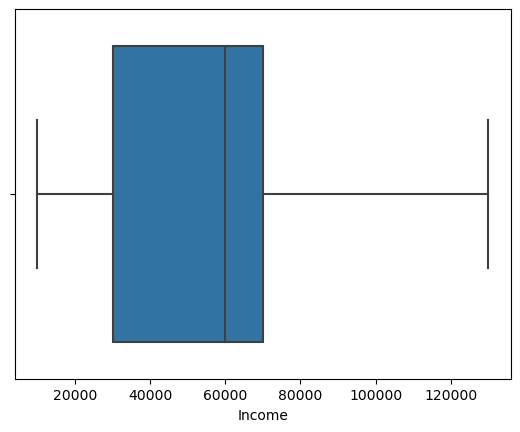

In [300]:
sns.boxplot(df["Income"])

In [301]:
# Removing outliers for Age

a25=df["Age"].quantile(0.25)
a75=df["Age"].quantile(0.75)
iqr1=a75-a25
al=a75+1.5*iqr1
pl=a25-1.5*iqr1
df['Age']=np.where(df['Age']>al,al,np.where(df['Age']<pl,pl,df['Age']))

<AxesSubplot:xlabel='Age'>

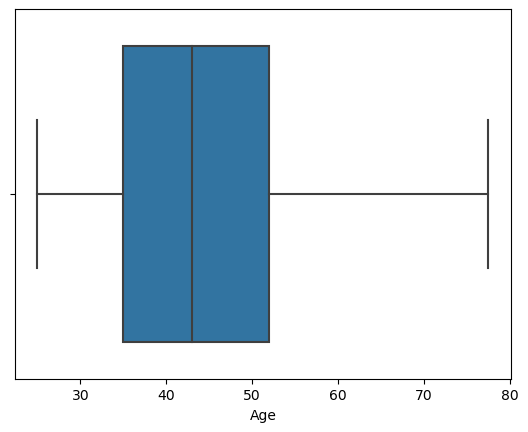

In [302]:
sns.boxplot(df['Age'])

In [303]:
# Removing outliers for children

c25=df["Children"].quantile(0.25)
c75=df["Children"].quantile(0.75)
ciqr=c75-c25
cul=c75+1.5*ciqr
cll=c25-1.5*ciqr
df['Children']=np.where(df['Children']>cul,cul,np.where(df['Children']<cll,cll,df['Children']))

<AxesSubplot:xlabel='Children'>

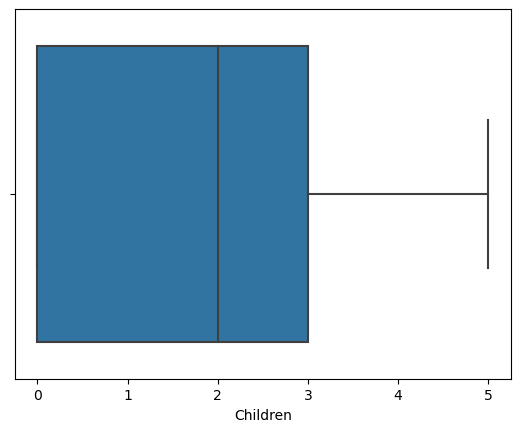

In [304]:
sns.boxplot(df['Children'])

In [305]:
# Removing outliers for cars

k25=df["Cars"].quantile(0.25)
k75=df["Cars"].quantile(0.75)
kiqr=k75-k25
kul=k75+1.5*kiqr
kll=k25-1.5*kiqr
df['Cars']=np.where(df['Cars']>kul,kul,np.where(df['Cars']<kll,kll,df['Cars']))

<AxesSubplot:xlabel='Cars'>

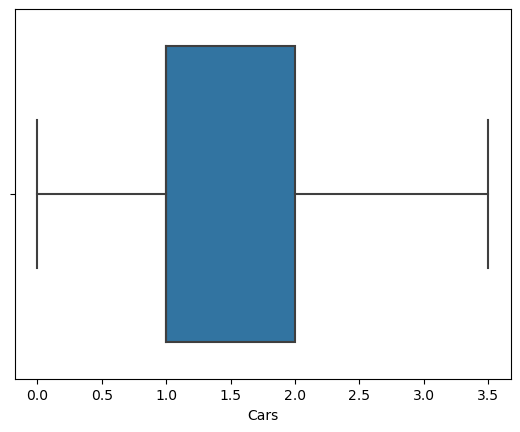

In [306]:
sns.boxplot(df['Cars'])

<AxesSubplot:xlabel='Income', ylabel='Density'>

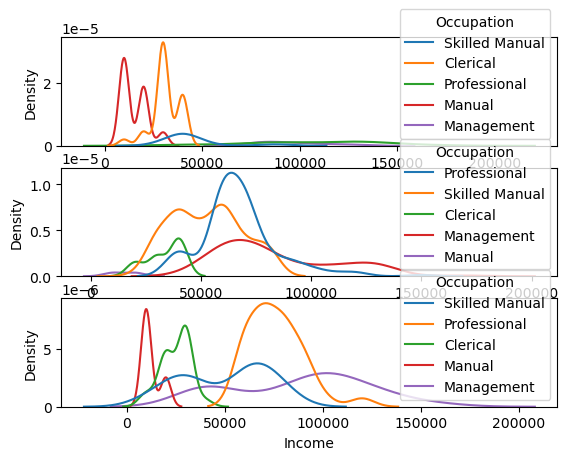

In [307]:
# Using Matplotlib for Subploting
fig, axes = plt.subplots(3,1)
sns.kdeplot(data = newdf[newdf['Region'] == 'Europe'], x = 'Income', hue = 'Occupation', ax = axes[0])
sns.kdeplot(data = newdf[newdf['Region']=='North America'],x='Income', hue='Occupation', ax=axes[1])
sns.kdeplot(data = newdf[newdf['Region']=='Pacific'],x='Income', hue='Occupation', ax=axes[2])

<AxesSubplot:xlabel='Region', ylabel='Children'>

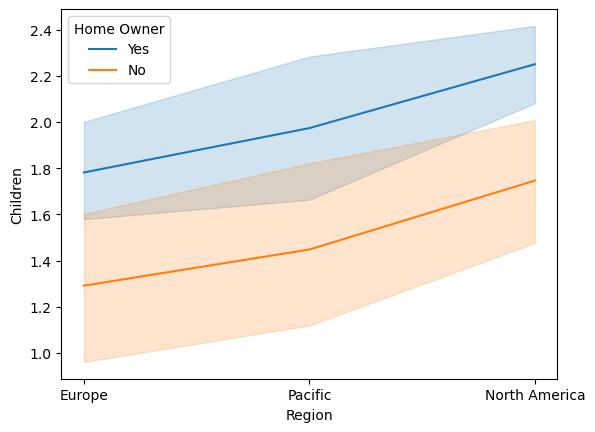

In [308]:
# Finding Effect On children Data by Region and Home Owner Ship.
sns.lineplot (x='Region', y='Children', hue = 'Home Owner', data=newdf)

<AxesSubplot:xlabel='Region', ylabel='Cars'>

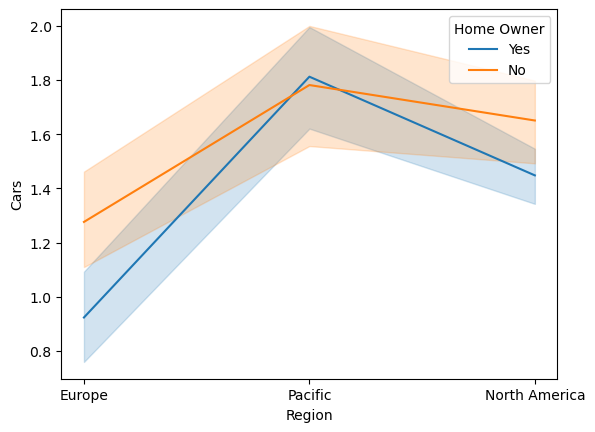

In [309]:
# Finding Effect On Age Data by Region and Home Owner Ship.
sns.lineplot(data=df, y='Cars', x='Region', hue = 'Home Owner')

<AxesSubplot:ylabel='None'>

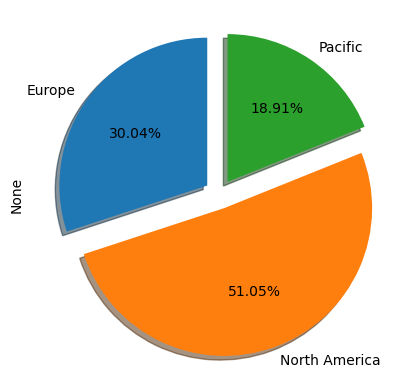

In [310]:
# Showing pie plot for region 

newdf.groupby('Region').size().plot(kind='pie',autopct='%1.2f%%',shadow=True,startangle=90,explode=(0.1,0.1,0.1))

<AxesSubplot:ylabel='None'>

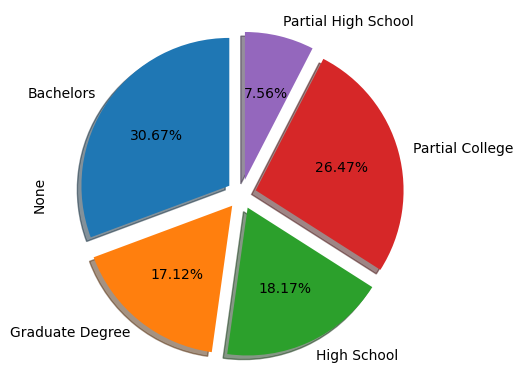

In [311]:
# Showing pie plot for Education

newdf.groupby('Education').size().plot(kind='pie',autopct='%1.2f%%',shadow=True,startangle=90,explode=(0.1,0.1,0.1,0.1,0.1))

<AxesSubplot:xlabel='Income', ylabel='Count'>

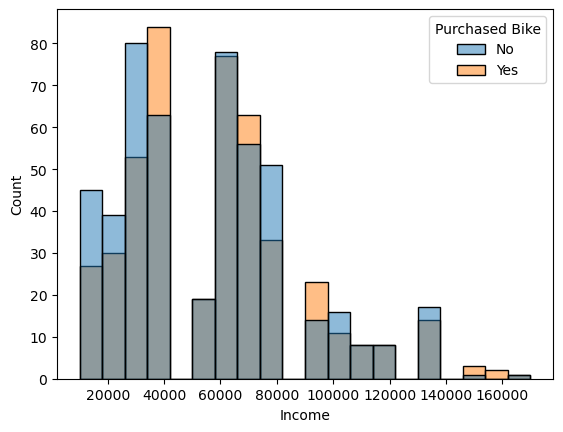

In [312]:
# Showing The Income And Purchased Bike Relation In Histplot.
sns.histplot(x="Income", hue="Purchased Bike", data=newdf)

<AxesSubplot:xlabel='Age', ylabel='Count'>

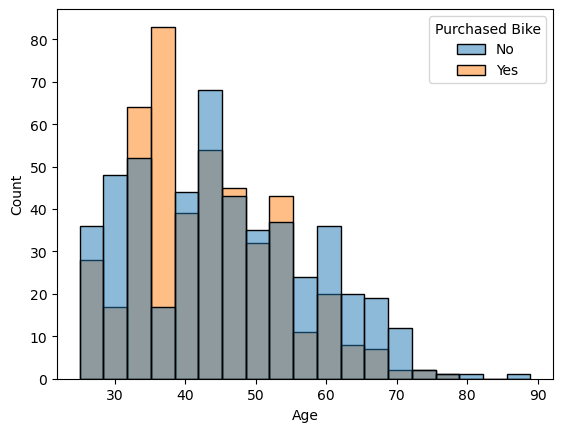

In [313]:
# Showing The Age And Purchased Bike Relation.
sns.histplot(x="Age", hue="Purchased Bike", data=newdf)

<AxesSubplot:xlabel='Occupation', ylabel='Income'>

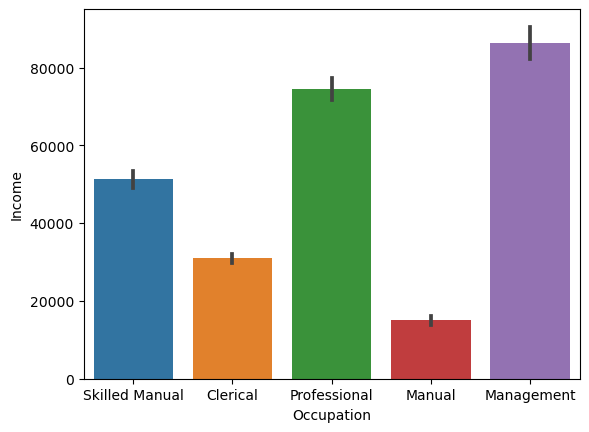

In [314]:
# checking relation for occupation and income with barplot
sns.barplot(x="Occupation", y="Income",data=newdf)

<AxesSubplot:xlabel='Home Owner', ylabel='count'>

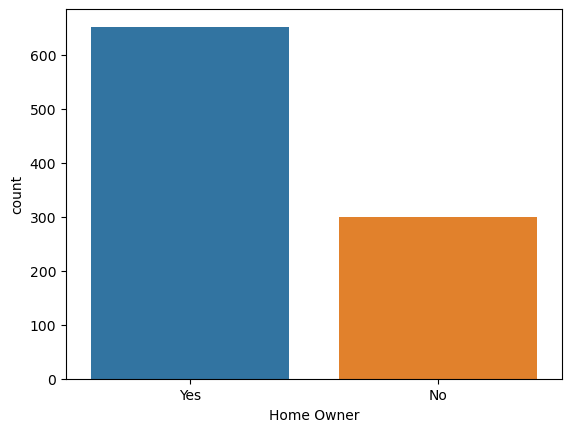

In [315]:
# checking countplot for home owner
sns.countplot(x="Home Owner",data=newdf)

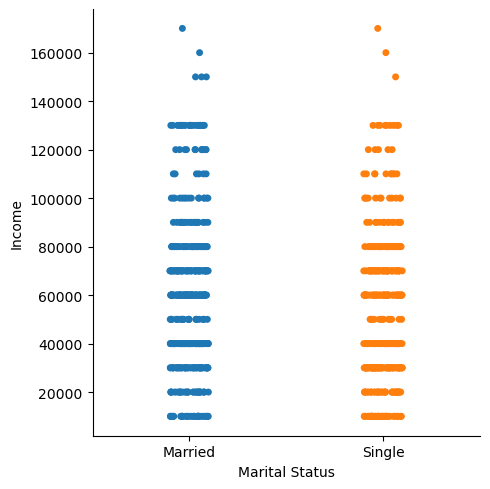

In [316]:
# checking categorial plot for marital status and income
sns.catplot(x="Marital Status",y="Income",data=newdf)

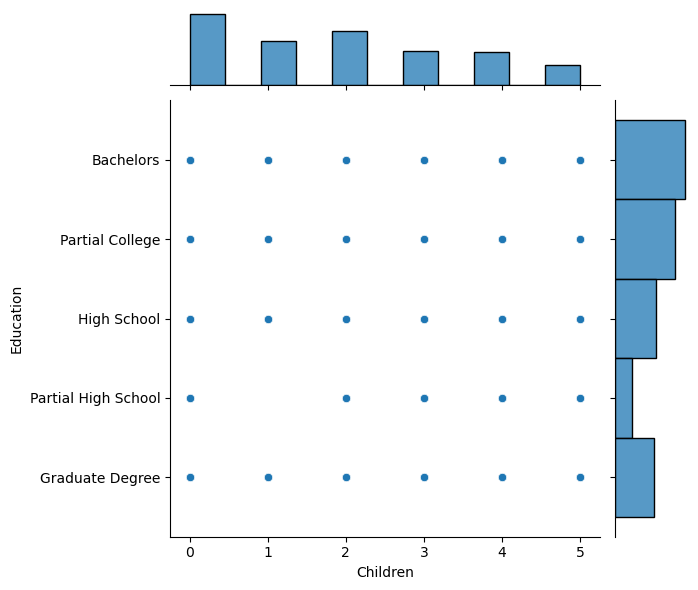

In [317]:
# checking jointplot for children and education
sns.jointplot(x='Children',y='Education',data=newdf)

<AxesSubplot:xlabel='Occupation', ylabel='Income'>

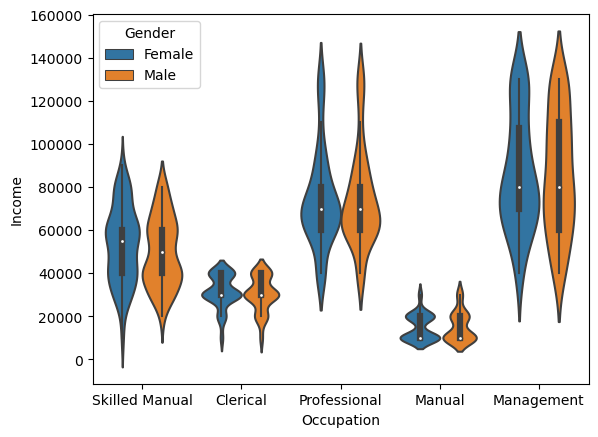

In [318]:
# checking violinplot for occupation and income
sns.violinplot(x="Occupation",y="Income",data=df,hue="Gender")

<AxesSubplot:xlabel='Region', ylabel='Commute Distance'>

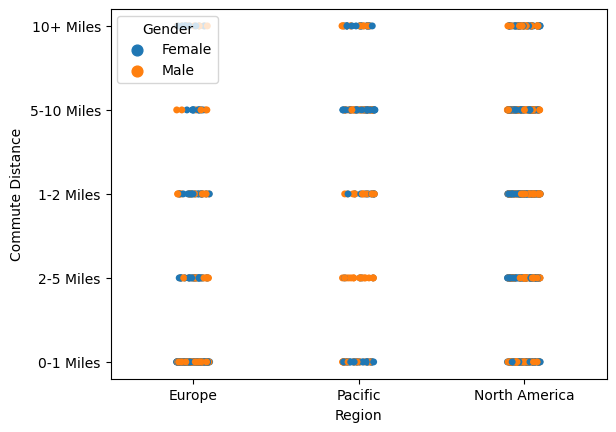

In [319]:
# checking stripplot for region and commute distance
sns.stripplot(x="Region",y="Commute Distance",data=newdf,hue="Gender")

<AxesSubplot:xlabel='Age', ylabel='Density'>

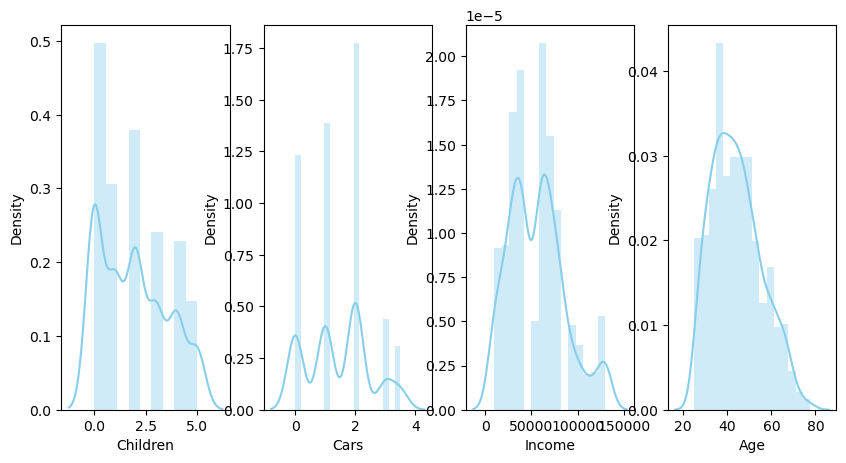

In [320]:
# Making distplot
plt.subplots(1,4,figsize=(10,5))
plt.subplot(1,4,1)
sns.distplot(df['Children'],color='skyblue')
plt.subplot(1,4,2)
sns.distplot(df['Cars'],color='skyblue')
plt.subplot(1,4,3)
sns.distplot(df['Income'],color='skyblue')
plt.subplot(1,4,4)
sns.distplot(df['Age'],color='skyblue')

In [321]:
newdf

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,13466,Married,Male,80000.0,5.0,Partial College,Professional,Yes,3.0,1-2 Miles,North America,46.0,No
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No


In [322]:
# checking dataframe as commute distance has been converted
newdf

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,13466,Married,Male,80000.0,5.0,Partial College,Professional,Yes,3.0,1-2 Miles,North America,46.0,No
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No


In [323]:
# converting categorial values to numeric values
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
newdf[catcol]=oe.fit_transform(newdf[catcol])

In [324]:
# checking for all categorial values has been converted into numerical 
newdf

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,0.0,0.0,40000.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,42.0,0.0
1,24107,0.0,1.0,30000.0,3.0,3.0,0.0,1.0,1.0,0.0,0.0,43.0,0.0
2,14177,0.0,1.0,80000.0,5.0,3.0,3.0,0.0,2.0,3.0,0.0,60.0,0.0
4,25597,1.0,1.0,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,1.0
5,13507,0.0,0.0,10000.0,2.0,3.0,2.0,1.0,0.0,1.0,0.0,50.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,13466,0.0,1.0,80000.0,5.0,3.0,3.0,1.0,3.0,1.0,1.0,46.0,0.0
995,23731,0.0,1.0,60000.0,2.0,2.0,3.0,1.0,2.0,3.0,1.0,54.0,1.0
996,28672,1.0,1.0,70000.0,4.0,1.0,3.0,1.0,0.0,3.0,1.0,35.0,1.0
998,19664,1.0,1.0,100000.0,3.0,0.0,1.0,0.0,3.0,1.0,1.0,38.0,0.0


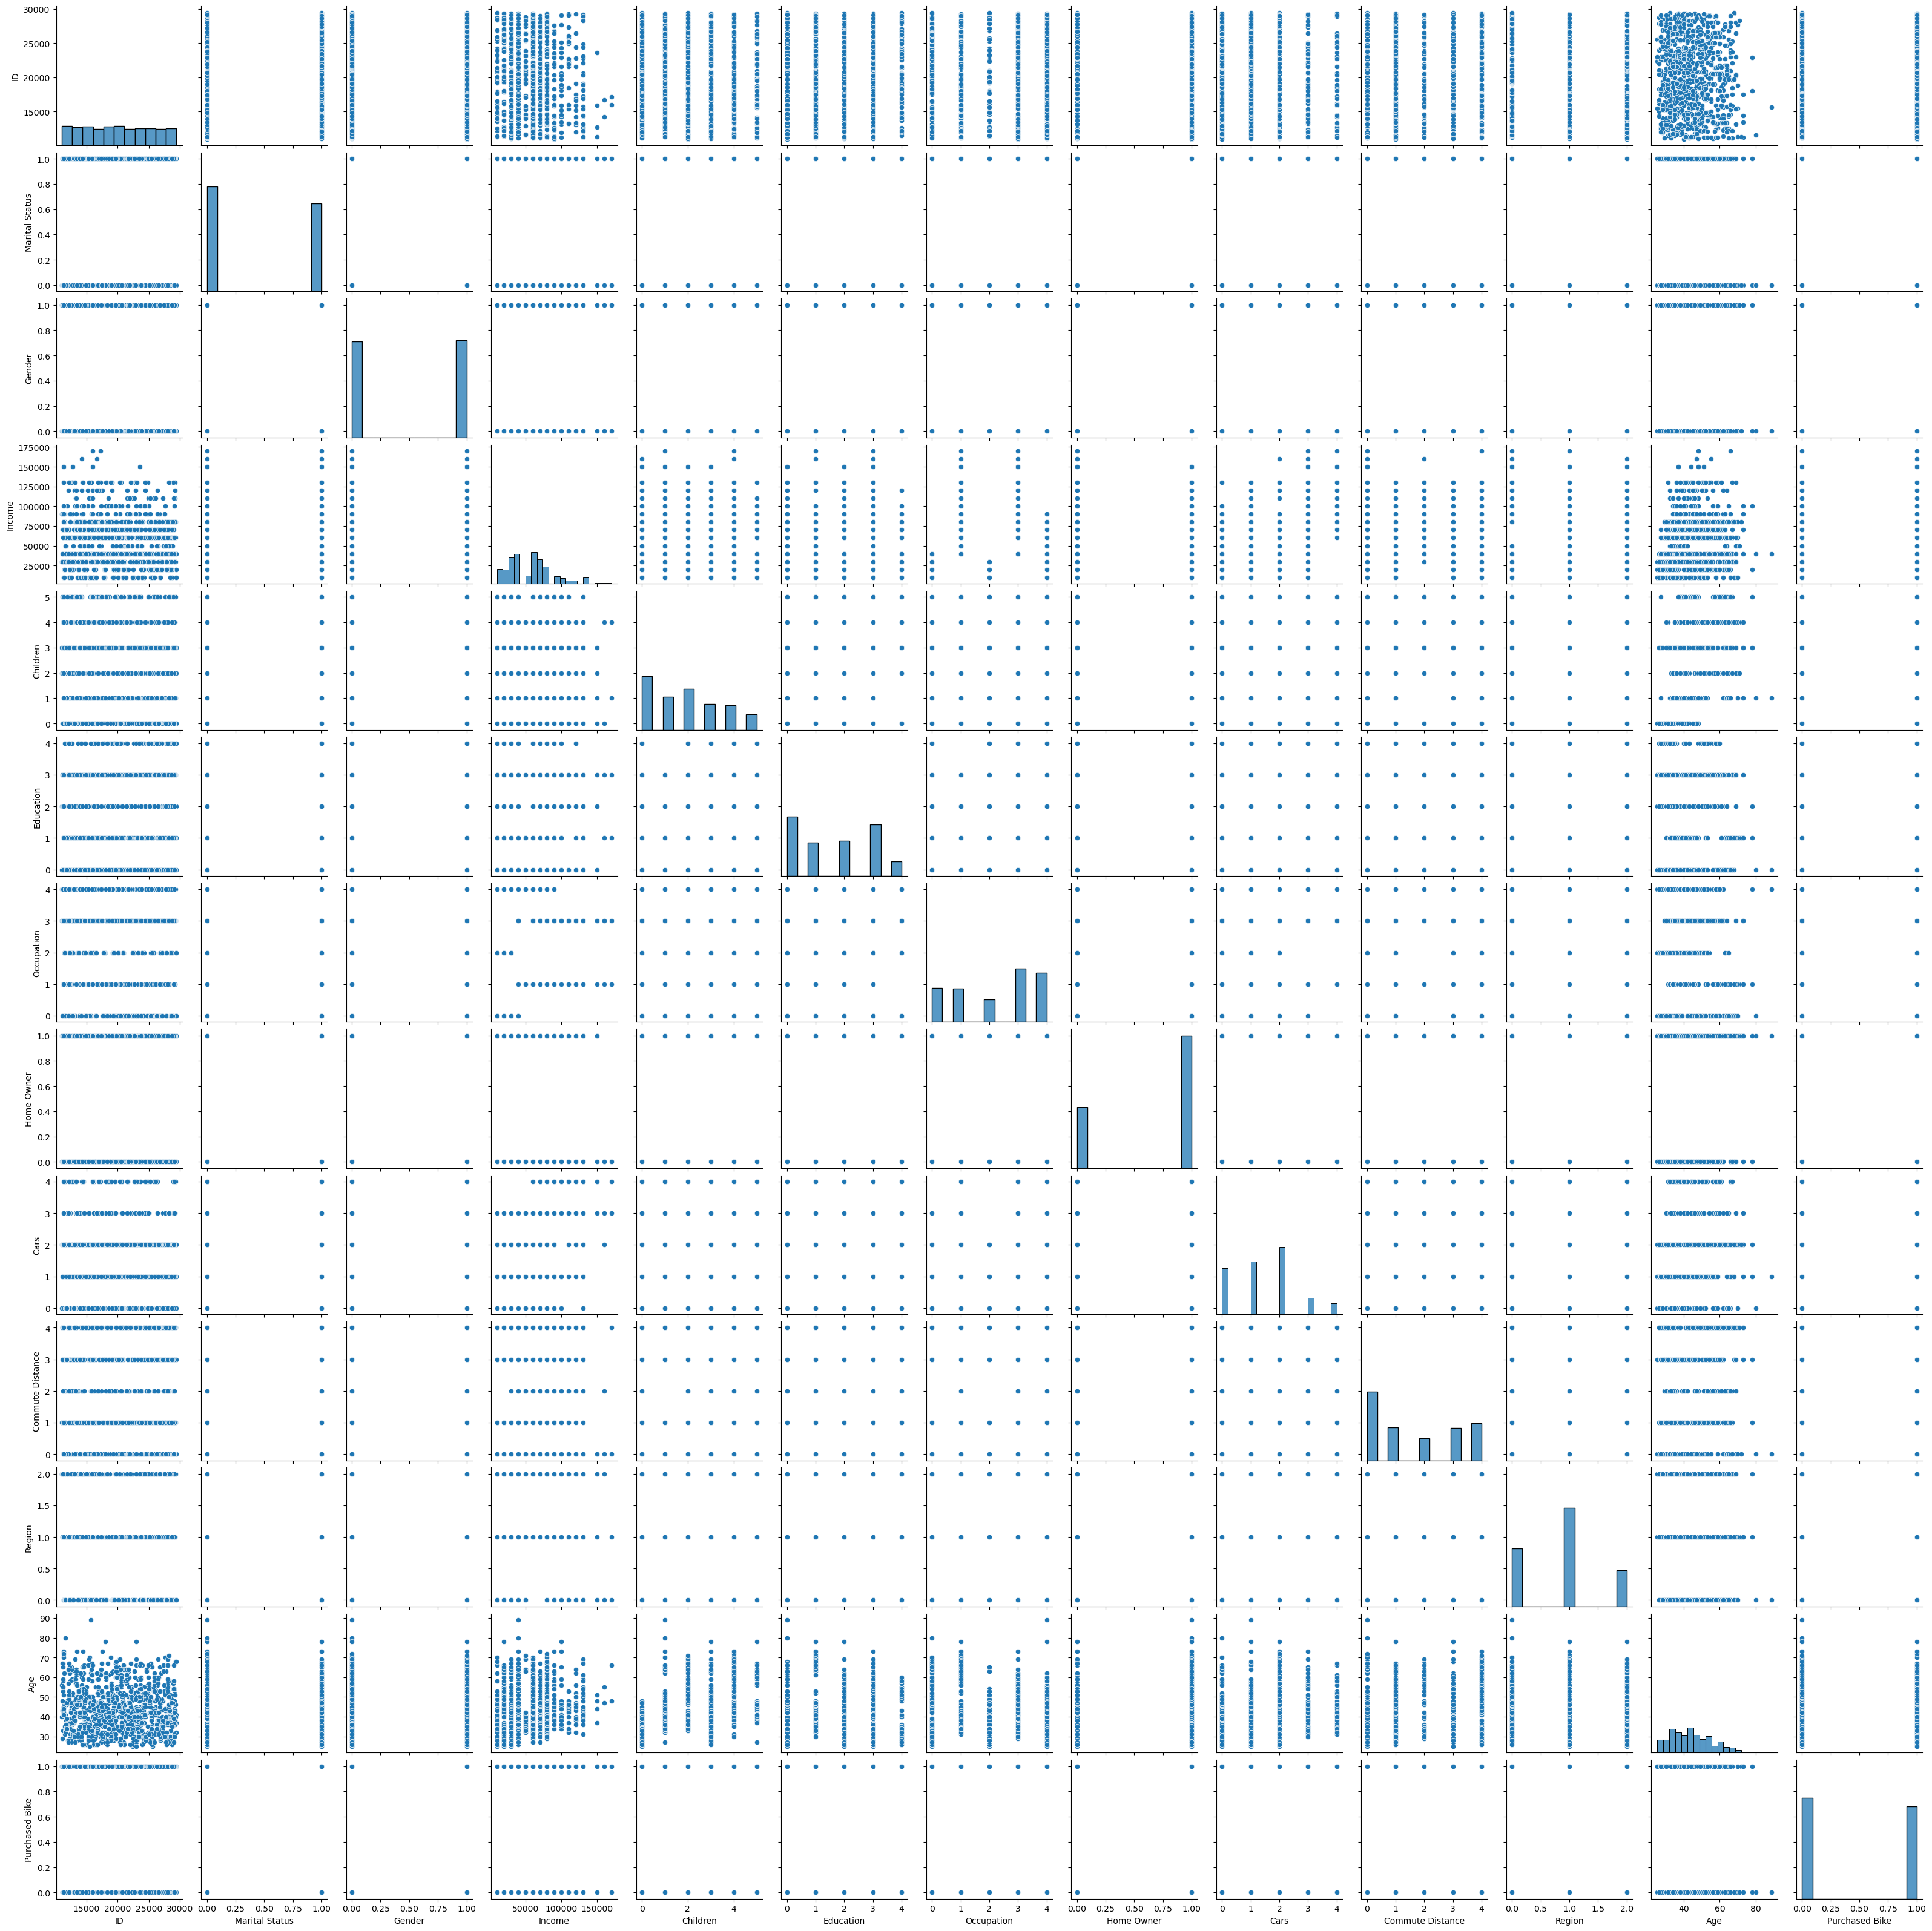

In [325]:
# making pairplot to show relationships between variables within a dataset.
sns.pairplot(newdf)

In [326]:
# dropping Id column as it has no meaning in dataframe
newdf.drop(['ID'],axis=1,inplace=True)

<AxesSubplot:>

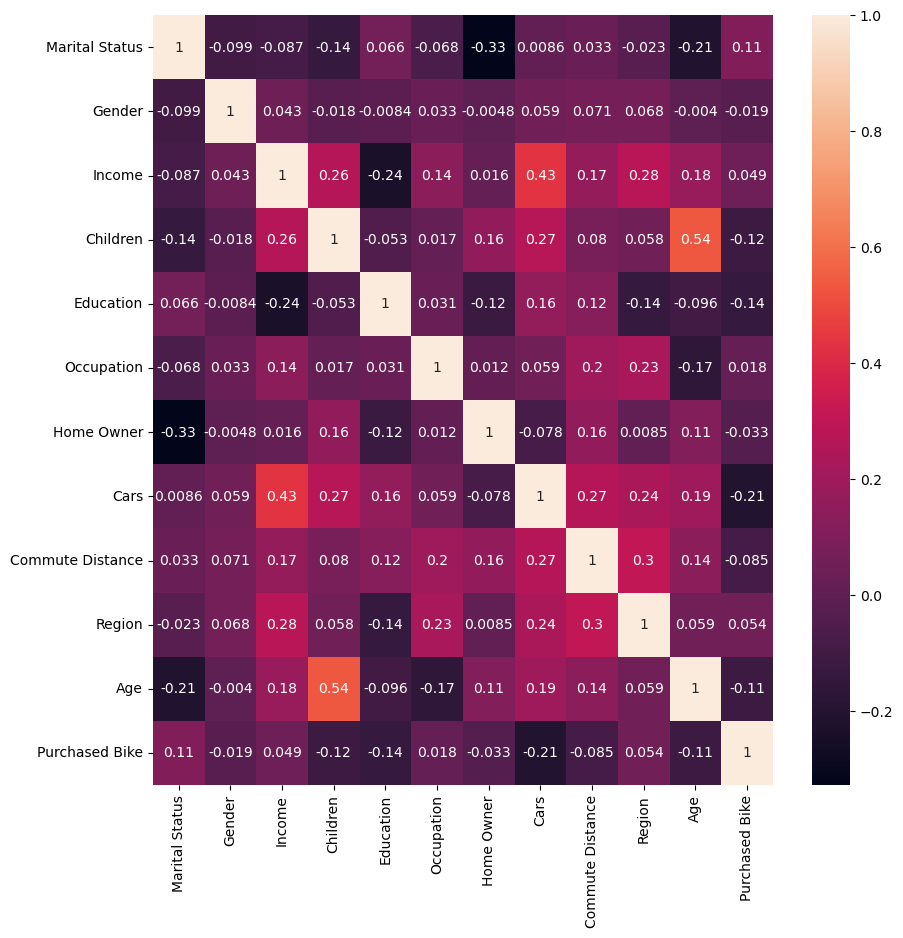

In [327]:
# making heatmap to check corelation 
plt.figure(figsize=(10,10))
sns.heatmap(newdf.corr(),annot=True)

In [328]:
# stripping for feautres
x=newdf.iloc[:,:-1]
x

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age
0,0.0,0.0,40000.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,42.0
1,0.0,1.0,30000.0,3.0,3.0,0.0,1.0,1.0,0.0,0.0,43.0
2,0.0,1.0,80000.0,5.0,3.0,3.0,0.0,2.0,3.0,0.0,60.0
4,1.0,1.0,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0
5,0.0,0.0,10000.0,2.0,3.0,2.0,1.0,0.0,1.0,0.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...
994,0.0,1.0,80000.0,5.0,3.0,3.0,1.0,3.0,1.0,1.0,46.0
995,0.0,1.0,60000.0,2.0,2.0,3.0,1.0,2.0,3.0,1.0,54.0
996,1.0,1.0,70000.0,4.0,1.0,3.0,1.0,0.0,3.0,1.0,35.0
998,1.0,1.0,100000.0,3.0,0.0,1.0,0.0,3.0,1.0,1.0,38.0


In [329]:
# stripping for target
y=newdf.iloc[:,-1]
y

0      0.0
1      0.0
2      0.0
4      1.0
5      0.0
      ... 
994    0.0
995    1.0
996    1.0
998    0.0
999    1.0
Name: Purchased Bike, Length: 952, dtype: float64

In [330]:
# importing train test split to divide data into training and testing model
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [331]:
xtrain.shape

(666, 11)

In [332]:
xtest.shape

(286, 11)

In [333]:
ytrain.shape

(666,)

In [334]:
ytest.shape

(286,)

In [335]:
# importing all classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [336]:
# Creating mymodel function to apply train test 
def mymodel(model):
    
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)

    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)

    print(f"Training score:{train}\nTesting score:{test}")
    print(classification_report(ytest,ypred))

    return model

In [337]:
# checking training and testing accuracy with kneighbor classifier
knn=mymodel(KNeighborsClassifier())

Training score:0.7852852852852853
Testing score:0.6433566433566433
              precision    recall  f1-score   support

         0.0       0.66      0.69      0.67       153
         1.0       0.62      0.59      0.61       133

    accuracy                           0.64       286
   macro avg       0.64      0.64      0.64       286
weighted avg       0.64      0.64      0.64       286



In [338]:
# checking training and testing accuracy with Randomforest classifier
rc=mymodel(RandomForestClassifier())

Training score:0.996996996996997
Testing score:0.6818181818181818
              precision    recall  f1-score   support

         0.0       0.69      0.73      0.71       153
         1.0       0.67      0.63      0.65       133

    accuracy                           0.68       286
   macro avg       0.68      0.68      0.68       286
weighted avg       0.68      0.68      0.68       286



In [339]:
# checking training and testing accuracy with Logistic Regression
lr=mymodel(LogisticRegression())

Training score:0.527027027027027
Testing score:0.5874125874125874
              precision    recall  f1-score   support

         0.0       0.59      0.78      0.67       153
         1.0       0.59      0.37      0.45       133

    accuracy                           0.59       286
   macro avg       0.59      0.57      0.56       286
weighted avg       0.59      0.59      0.57       286



In [340]:
# checking training and testing accuracy with SVM
svm=mymodel(SVC())

Training score:0.539039039039039
Testing score:0.4755244755244755
              precision    recall  f1-score   support

         0.0       0.51      0.50      0.50       153
         1.0       0.44      0.45      0.44       133

    accuracy                           0.48       286
   macro avg       0.47      0.47      0.47       286
weighted avg       0.48      0.48      0.48       286



In [341]:
# checking training and testing accuracy with Decisiontree classifier
dtc=mymodel(DecisionTreeClassifier())

Training score:0.996996996996997
Testing score:0.6153846153846154
              precision    recall  f1-score   support

         0.0       0.65      0.60      0.63       153
         1.0       0.58      0.63      0.60       133

    accuracy                           0.62       286
   macro avg       0.62      0.62      0.62       286
weighted avg       0.62      0.62      0.62       286



In [342]:
xg=mymodel(XGBClassifier())

Training score:0.9924924924924925
Testing score:0.6608391608391608
              precision    recall  f1-score   support

         0.0       0.69      0.67      0.68       153
         1.0       0.63      0.65      0.64       133

    accuracy                           0.66       286
   macro avg       0.66      0.66      0.66       286
weighted avg       0.66      0.66      0.66       286



In [343]:
ad=mymodel(AdaBoostClassifier())

Training score:0.7117117117117117
Testing score:0.6223776223776224
              precision    recall  f1-score   support

         0.0       0.65      0.65      0.65       153
         1.0       0.59      0.59      0.59       133

    accuracy                           0.62       286
   macro avg       0.62      0.62      0.62       286
weighted avg       0.62      0.62      0.62       286



In [344]:
# scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [345]:
knn1=mymodel(KNeighborsClassifier())

Training score:0.7627627627627628
Testing score:0.6258741258741258
              precision    recall  f1-score   support

         0.0       0.64      0.68      0.66       153
         1.0       0.60      0.56      0.58       133

    accuracy                           0.63       286
   macro avg       0.62      0.62      0.62       286
weighted avg       0.62      0.63      0.62       286



In [346]:
rc1=mymodel(RandomForestClassifier())

Training score:0.996996996996997
Testing score:0.7062937062937062
              precision    recall  f1-score   support

         0.0       0.73      0.73      0.73       153
         1.0       0.68      0.68      0.68       133

    accuracy                           0.71       286
   macro avg       0.70      0.70      0.70       286
weighted avg       0.71      0.71      0.71       286



In [347]:
lr1=mymodel(LogisticRegression())

Training score:0.6261261261261262
Testing score:0.6608391608391608
              precision    recall  f1-score   support

         0.0       0.68      0.68      0.68       153
         1.0       0.63      0.64      0.64       133

    accuracy                           0.66       286
   macro avg       0.66      0.66      0.66       286
weighted avg       0.66      0.66      0.66       286



In [348]:
dtc1=mymodel(DecisionTreeClassifier())

Training score:0.996996996996997
Testing score:0.6608391608391608
              precision    recall  f1-score   support

         0.0       0.70      0.64      0.67       153
         1.0       0.62      0.68      0.65       133

    accuracy                           0.66       286
   macro avg       0.66      0.66      0.66       286
weighted avg       0.66      0.66      0.66       286



In [349]:
svm1=mymodel(SVC())

Training score:0.7402402402402403
Testing score:0.6643356643356644
              precision    recall  f1-score   support

         0.0       0.70      0.65      0.68       153
         1.0       0.63      0.68      0.65       133

    accuracy                           0.66       286
   macro avg       0.66      0.67      0.66       286
weighted avg       0.67      0.66      0.66       286



In [350]:
xg1=mymodel(XGBClassifier())

Training score:0.9924924924924925
Testing score:0.6818181818181818
              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70       153
         1.0       0.66      0.66      0.66       133

    accuracy                           0.68       286
   macro avg       0.68      0.68      0.68       286
weighted avg       0.68      0.68      0.68       286



In [351]:
ad1=mymodel(AdaBoostClassifier())

Training score:0.7117117117117117
Testing score:0.6223776223776224
              precision    recall  f1-score   support

         0.0       0.65      0.65      0.65       153
         1.0       0.59      0.59      0.59       133

    accuracy                           0.62       286
   macro avg       0.62      0.62      0.62       286
weighted avg       0.62      0.62      0.62       286



In [352]:
# hyperparameter tunning
# max_depth
# min_sample_leaf

In [353]:
dt1=mymodel(DecisionTreeClassifier(max_depth=10,min_samples_leaf=15))

Training score:0.7177177177177178
Testing score:0.6328671328671329
              precision    recall  f1-score   support

         0.0       0.64      0.72      0.68       153
         1.0       0.62      0.53      0.57       133

    accuracy                           0.63       286
   macro avg       0.63      0.63      0.63       286
weighted avg       0.63      0.63      0.63       286



In [354]:
# using for loop to check best range for min sample leaf
for i in range(1,50):
    dt1=DecisionTreeClassifier(min_samples_leaf=i)
    dt1.fit(xtrain,ytrain)
    train=dt1.score(xtrain,ytrain)
    test=dt1.score(xtest,ytest)

    print(f"{i}     {train}     {test}")

1     0.996996996996997     0.6468531468531469
2     0.9084084084084084     0.6748251748251748
3     0.8768768768768769     0.6608391608391608
4     0.8453453453453453     0.6573426573426573
5     0.8288288288288288     0.6853146853146853
6     0.8048048048048048     0.6398601398601399
7     0.7897897897897898     0.6258741258741258
8     0.7747747747747747     0.6328671328671329
9     0.7702702702702703     0.6083916083916084
10     0.7582582582582582     0.6153846153846154
11     0.7582582582582582     0.6328671328671329
12     0.7492492492492493     0.6293706293706294
13     0.7417417417417418     0.6153846153846154
14     0.7282282282282282     0.6048951048951049
15     0.7177177177177178     0.6328671328671329
16     0.7177177177177178     0.6573426573426573
17     0.7132132132132132     0.6293706293706294
18     0.6996996996996997     0.6748251748251748
19     0.6996996996996997     0.6503496503496503
20     0.6921921921921922     0.6818181818181818
21     0.6921921921921922     

In [355]:
dt2=mymodel(DecisionTreeClassifier(max_depth=7,min_samples_leaf=20))

Training score:0.6921921921921922
Testing score:0.6818181818181818
              precision    recall  f1-score   support

         0.0       0.69      0.74      0.71       153
         1.0       0.67      0.62      0.64       133

    accuracy                           0.68       286
   macro avg       0.68      0.68      0.68       286
weighted avg       0.68      0.68      0.68       286



In [356]:
import pickle
pickle.dump(dt2,open('model.pkl','wb'))